In [2]:
install.packages("gclus")

install.packages("devtools")
#library(ggvegan)

Installing package into 'C:/Users/edo13/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'gclus' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\edo13\AppData\Local\Temp\RtmpAZeQN1\downloaded_packages


Installing package into 'C:/Users/edo13/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\edo13\AppData\Local\Temp\RtmpAZeQN1\downloaded_packages


In [3]:
library(vegan)
library(readxl)
library(ggplot2)
library(tibble)
library(gclus)
library(repr)

Loading required package: permute

Loading required package: lattice

This is vegan 2.7-0

Loading required package: cluster

Registered S3 method overwritten by 'gclus':
  method         from 
  reorder.hclust vegan



In [6]:
dataset = read_excel("C:/Users/edo13/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", range = cell_rows(4:328))
#dataset = read_excel("/Users/edoardo/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", range = cell_rows(4:328))

New names:
• `Arachnomyces` -> `Arachnomyces...77`
• `f__Gymnoascaceae` -> `f__Gymnoascaceae...81`
• `c__Eurotiomycetes` -> `c__Eurotiomycetes...87`
• `Ascobolus` -> `Ascobolus...100`
• `f__Pezizaceae` -> `f__Pezizaceae...103`
• `f__Pyronemataceae` -> `f__Pyronemataceae...108`
• `o__Hypocreales` -> `o__Hypocreales...146`
• `o__Sordariales` -> `o__Sordariales...153`
• `Filobasidium` -> `Filobasidium...219`
• `Arachnomyces` -> `Arachnomyces...258`
• `Ascobolus` -> `Ascobolus...259`
• `Filobasidium` -> `Filobasidium...274`
• `f__Gymnoascaceae` -> `f__Gymnoascaceae...311`
• `c__Eurotiomycetes` -> `c__Eurotiomycetes...312`
• `f__Pezizaceae` -> `f__Pezizaceae...313`
• `f__Pyronemataceae` -> `f__Pyronemataceae...314`
• `o__Hypocreales` -> `o__Hypocreales...315`
• `o__Sordariales` -> `o__Sordariales...318`
• `` -> `...326`


In [7]:
#data = dataset[, c(1:1, 3:3, 6:6, 15:16, 20:20, 24:24)]
data = dataset[, c(1:13, 15:24)]

In [33]:
### SELECT ONLY ONE SITE

#data = data[data$SITE == "S", ]

In [8]:
# defining explanatory variables and phyla data
# prepare dataframes for analysis

abiotic = data[, c(1:1, 3:3, 6:13)]
#abiotic = data[, c(7:13)]

df_phyla <- data[, 14:23]
df_phyla <- as.data.frame(df_phyla)

abiotic <- as.data.frame(abiotic)

data <- as.data.frame(data)

df_phyla[is.na(df_phyla)] <- 0
data[is.na(data)] <- 0
abiotic[is.na(abiotic)] <- 0

abiotic <- abiotic[rowSums(df_phyla != 0) > 0, ]
data <- data[rowSums(df_phyla != 0) > 0, ]
df_phyla <- df_phyla[rowSums(df_phyla != 0) > 0, ]

#abiotic_standard <- as.data.frame(scale(abiotic))

# PCA 


Call:
rda(X = df_phyla) 

Partitioning of variance:
              Inertia Proportion
Total            1170          1
Unconstrained    1170          1

Eigenvalues, and their contribution to the variance 

Importance of components:
                           PC1      PC2      PC3      PC4      PC5     PC6
Eigenvalue            691.0724 259.0981 120.0576 50.03848 23.61732 13.5788
Proportion Explained    0.5905   0.2214   0.1026  0.04276  0.02018  0.0116
Cumulative Proportion   0.5905   0.8119   0.9145  0.95725  0.97743  0.9890
                          PC7       PC8       PC9
Eigenvalue            12.5189 0.2591901 5.374e-02
Proportion Explained   0.0107 0.0002215 4.592e-05
Cumulative Proportion  0.9997 0.9999541 1.000e+00


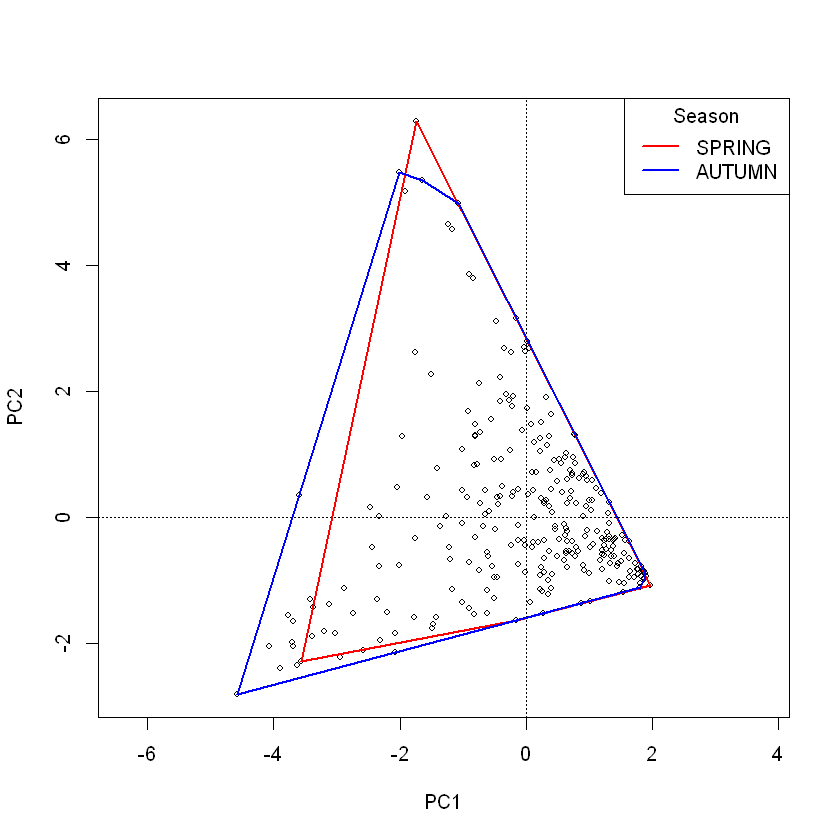

In [9]:
# Set the output file to a PDF
#pdf("pca.pdf")

mypca <- rda(df_phyla)

# Summarize the RDA result
summary(mypca)

# Plot the RDA result

ordiplot(mypca, display = c("sites"), type = "points")

groups <- data$Season
ordihull(scores(mypca, display = "sites"), groups, col = c("red", "blue", "green"), lwd = 2)
# Add a legend
legend("topright", legend = c("SPRING", "AUTUMN"), col =  c("red", "blue"), lwd = 2, title = "Season")

#dev.off()


# RDA - abiotics as explanatory variables


Call:
rda(formula = df_phyla ~ SITE + TREAT + Season + S.M + OM + `EC-(ds/m)` +      pH + `TN-(%)` + `OC-(%)` + `C:N`, data = abiotic) 

Partitioning of variance:
              Inertia Proportion
Total          1170.3     1.0000
Constrained     214.0     0.1829
Unconstrained   956.3     0.8171

Eigenvalues, and their contribution to the variance 

Importance of components:
                          RDA1     RDA2     RDA3     RDA4     RDA5      RDA6
Eigenvalue            144.9859 43.97767 18.07296 4.810625 1.701727 0.3715238
Proportion Explained    0.1239  0.03758  0.01544 0.004111 0.001454 0.0003175
Cumulative Proportion   0.1239  0.16147  0.17691 0.181020 0.182475 0.1827920
                           RDA7      RDA8      RDA9      PC1      PC2      PC3
Eigenvalue            8.597e-02 3.287e-03 1.136e-03 551.2025 217.1505 98.86634
Proportion Explained  7.346e-05 2.809e-06 9.706e-07   0.4710   0.1856  0.08448
Cumulative Proportion 1.829e-01 1.829e-01 1.829e-01   0.6539   0.8394  0.92390

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
SITE,1,13.370016,3.8588178,0.019
TREAT,2,63.245084,9.1268127,0.001
Season,1,86.204008,24.8799680,0.001
S.M,1,20.511613,5.9200064,0.007
OM,1,7.709903,2.2252115,0.101
`EC-(ds/m)`,1,3.701730,1.0683833,0.337
pH,1,4.187200,1.2084984,0.298
`TN-(%)`,1,6.529559,1.8845436,0.132
`OC-(%)`,1,5.220867,1.5068324,0.191


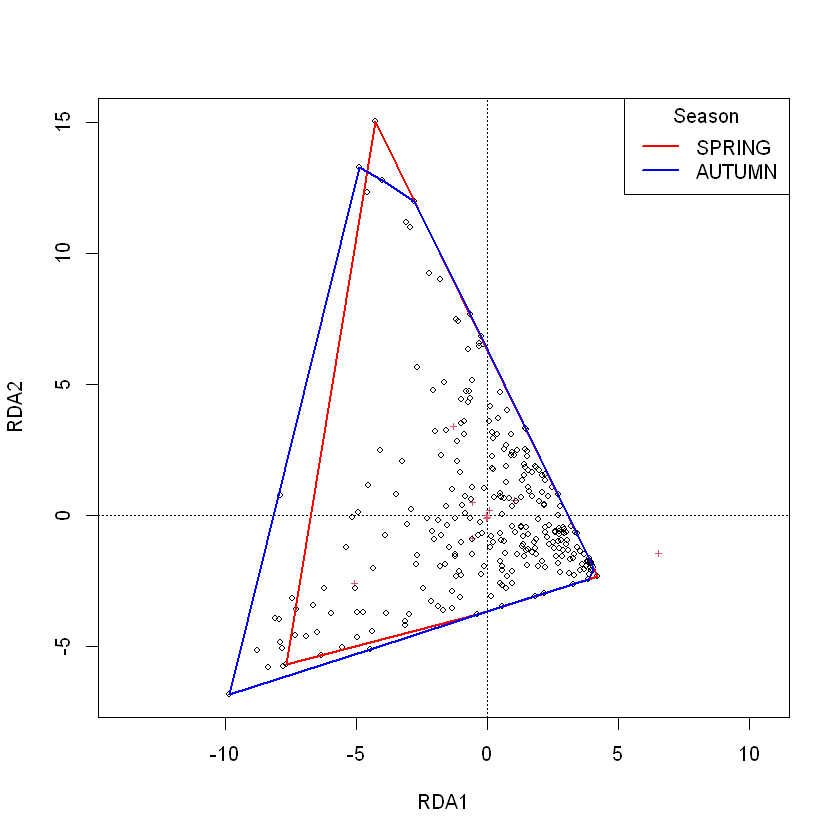

In [10]:
# Set the output file to a PDF
#pdf("rda_abiotics_TREAT_SITE.pdf")

myrda <- rda(df_phyla ~ .,
             data = abiotic)
# Summarize the RDA result
summary(myrda)

# Plot the RDA result

ordiplot(myrda, display = c("species", "sites"), type = "points")

envfit_result <- envfit(myrda, abiotic, perm = 999)

groups <- data$Season
ordihull(scores(myrda, display = "sites"), groups, col = c("red", "blue"), lwd = 2)

#plot(envfit_result, col = "darkgreen")

# Add a legend
legend("topright", legend = c("SPRING", "AUTUMN"), col =  c("red", "blue"), lwd = 2, title = "Season")

anova(myrda, by = "term")

#dev.off()


In [11]:
# Forward selection of variables:
fwd.sel <- ordiR2step(rda(df_phyla ~ 1, data = abiotic), # lower model limit (simple!)
               scope = formula(myrda), # upper model limit (the "full" model)
               direction = "forward",
               R2scope = TRUE, # can't surpass the "full" model's R2
               pstep = 1000,
               trace = FALSE) # change to TRUE to see the selection process!

In [12]:
fwd.sel$call

rda(formula = df_phyla ~ Season + TREAT + S.M + SITE + `TN-(%)`, 
    data = abiotic)

In [13]:
# Write our new model
myrda.signif <- rda(df_phyla ~ OM, data = abiotic)

In [14]:
anova.cca(myrda.signif, step = 1000, by = "term")

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
OM,1,14.52696,3.594764,0.028
Residual,286,1155.76748,NA,NA
